### Maternal Health Risk using EDA and machine learning
Many pregnant women die from pregnancy issues as a result of a lack of information on maternal health care during and after pregnancy. It is more common in rural regions and among lower-middle-class families in emerging countries. During pregnancy, every minute should be observed to ensure the proper growth of the baby and the safe delivery.

### Algorithms Classification
We used dataprep EDA and 5 algorithms Classification

- Logistic Regression
- K-nearest neighboard
- Decision Tree
- Random Forest
- Gradient Boosting Classification
- Data Set Information:

Data has been collected from different hospitals, community clinics, maternal health cares through the IoT based risk monitoring system.

- Age: Age in years when a woman is pregnant.
- SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
- HeartRate: A normal resting heart rate in beats per minute.
- Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

In [1]:
# To avoid any unnesscery warnings
import warnings
warnings.simplefilter(action="ignore")
warnings.filterwarnings('ignore')

In [2]:
import pyspark

In [3]:
! pip install seaborn

In [ ]:
#
from collections import Counter
from pyspark.sql import SparkSession

# import necessary package
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for file saving
import os

In [12]:
# pip install scikit-learn
! pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promo

In [15]:
! pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 9.9/9.9 MB 61.1 MB/s eta 0:00:00


In [4]:
# Algorithims
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support

In [5]:
# data directory
import os
for dirname, _ , filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [6]:
spark = SparkSession.builder.appName('practice').getOrCreate()

In [7]:
spark

In [9]:
df_pyspark = spark.read.csv("E:\gbc_ai\careers_planning\internships\Medial_treatment_DL\Maternal Health Risk Data Set.csv")

In [10]:
df_pyspark

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string]

In [11]:
df_pyspark = spark.read.option('header','true').csv("E:\gbc_ai\careers_planning\internships\Medial_treatment_DL\Maternal Health Risk Data Set.csv")

In [12]:
df_pyspark.show(n=10)

+---+----------+-----------+----+--------+---------+---------+
|Age|SystolicBP|DiastolicBP|  BS|BodyTemp|HeartRate|RiskLevel|
+---+----------+-----------+----+--------+---------+---------+
| 25|       130|         80|  15|      98|       86|high risk|
| 35|       140|         90|  13|      98|       70|high risk|
| 29|        90|         70|   8|     100|       80|high risk|
| 30|       140|         85|   7|      98|       70|high risk|
| 35|       120|         60| 6.1|      98|       76| low risk|
| 23|       140|         80|7.01|      98|       70|high risk|
| 23|       130|         70|7.01|      98|       78| mid risk|
| 35|        85|         60|  11|     102|       86|high risk|
| 32|       120|         90| 6.9|      98|       70| mid risk|
| 42|       130|         80|  18|      98|       70|high risk|
+---+----------+-----------+----+--------+---------+---------+
only showing top 10 rows



In [13]:
df_pyspark.printSchema()

root
 |-- Age: string (nullable = true)
 |-- SystolicBP: string (nullable = true)
 |-- DiastolicBP: string (nullable = true)
 |-- BS: string (nullable = true)
 |-- BodyTemp: string (nullable = true)
 |-- HeartRate: string (nullable = true)
 |-- RiskLevel: string (nullable = true)



In [14]:
df_pyspark.describe().show()

+-------+------------------+------------------+------------------+-----------------+-----------------+-----------------+---------+
|summary|               Age|        SystolicBP|       DiastolicBP|               BS|         BodyTemp|        HeartRate|RiskLevel|
+-------+------------------+------------------+------------------+-----------------+-----------------+-----------------+---------+
|  count|              1014|              1014|              1014|             1014|             1014|             1014|     1014|
|   mean|29.871794871794872|113.19822485207101| 76.46055226824457|8.725986193293886|98.66508875739645|74.30177514792899|     NULL|
| stddev|13.474385532634368|18.403912756342713|13.885795724160701|3.293531721151282|1.371384375599544|8.088702272115324|     NULL|
|    min|                10|               100|               100|               10|              100|               60|high risk|
|    max|                70|                99|                95|                9

In [15]:
df_pyspark= df_pyspark.groupBy(df_pyspark.columns).count().filter("count > 1").drop("count")
df_pyspark.show()

+---+----------+-----------+---+--------+---------+---------+
|Age|SystolicBP|DiastolicBP| BS|BodyTemp|HeartRate|RiskLevel|
+---+----------+-----------+---+--------+---------+---------+
| 35|       140|         90| 13|      98|       70|high risk|
| 50|       140|         80|6.7|      98|       70| mid risk|
| 21|       120|         80|7.5|      98|       76| low risk|
| 22|       120|         90|7.1|      98|       82| low risk|
| 12|        95|         60|6.1|     102|       60| low risk|
| 49|       140|         90| 15|      98|       90|high risk|
| 18|        90|         60|7.5|      98|       70| low risk|
| 54|       140|        100| 15|      98|       66|high risk|
| 17|        90|         65|6.1|     103|       67|high risk|
| 29|        90|         70|  8|     100|       80|high risk|
| 28|       120|         90|6.9|      98|       70| mid risk|
| 50|       140|         90| 15|      98|       90|high risk|
| 49|       120|         90|7.2|      98|       77| low risk|
| 40|   

In [8]:
m_p_df = pd.read_csv('E:\gbc_ai\careers_planning\internships\Medial_treatment_DL\datasets\Maternal Health Risk Data Set.csv')

In [9]:
m_p_df_copy = pd.read_csv('E:\gbc_ai\careers_planning\internships\Medial_treatment_DL\datasets\Maternal Health Risk Data Set.csv')

In [14]:
m_p_df.head(n=5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [15]:
m_p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [16]:
print(f"The dataset size: {m_p_df.shape}")

The dataset size: (1014, 7)


In [17]:
m_p_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [18]:
print(m_p_df_copy["RiskLevel"].value_counts())

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


In [19]:
m_p_df.tail(n=5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [20]:
m_p_df_copy.tail(n=5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [21]:
m_p_df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [ ]:
relative_path_maternal_features_description = os.path.join("..", "graphics", "maternal_features_description.png")

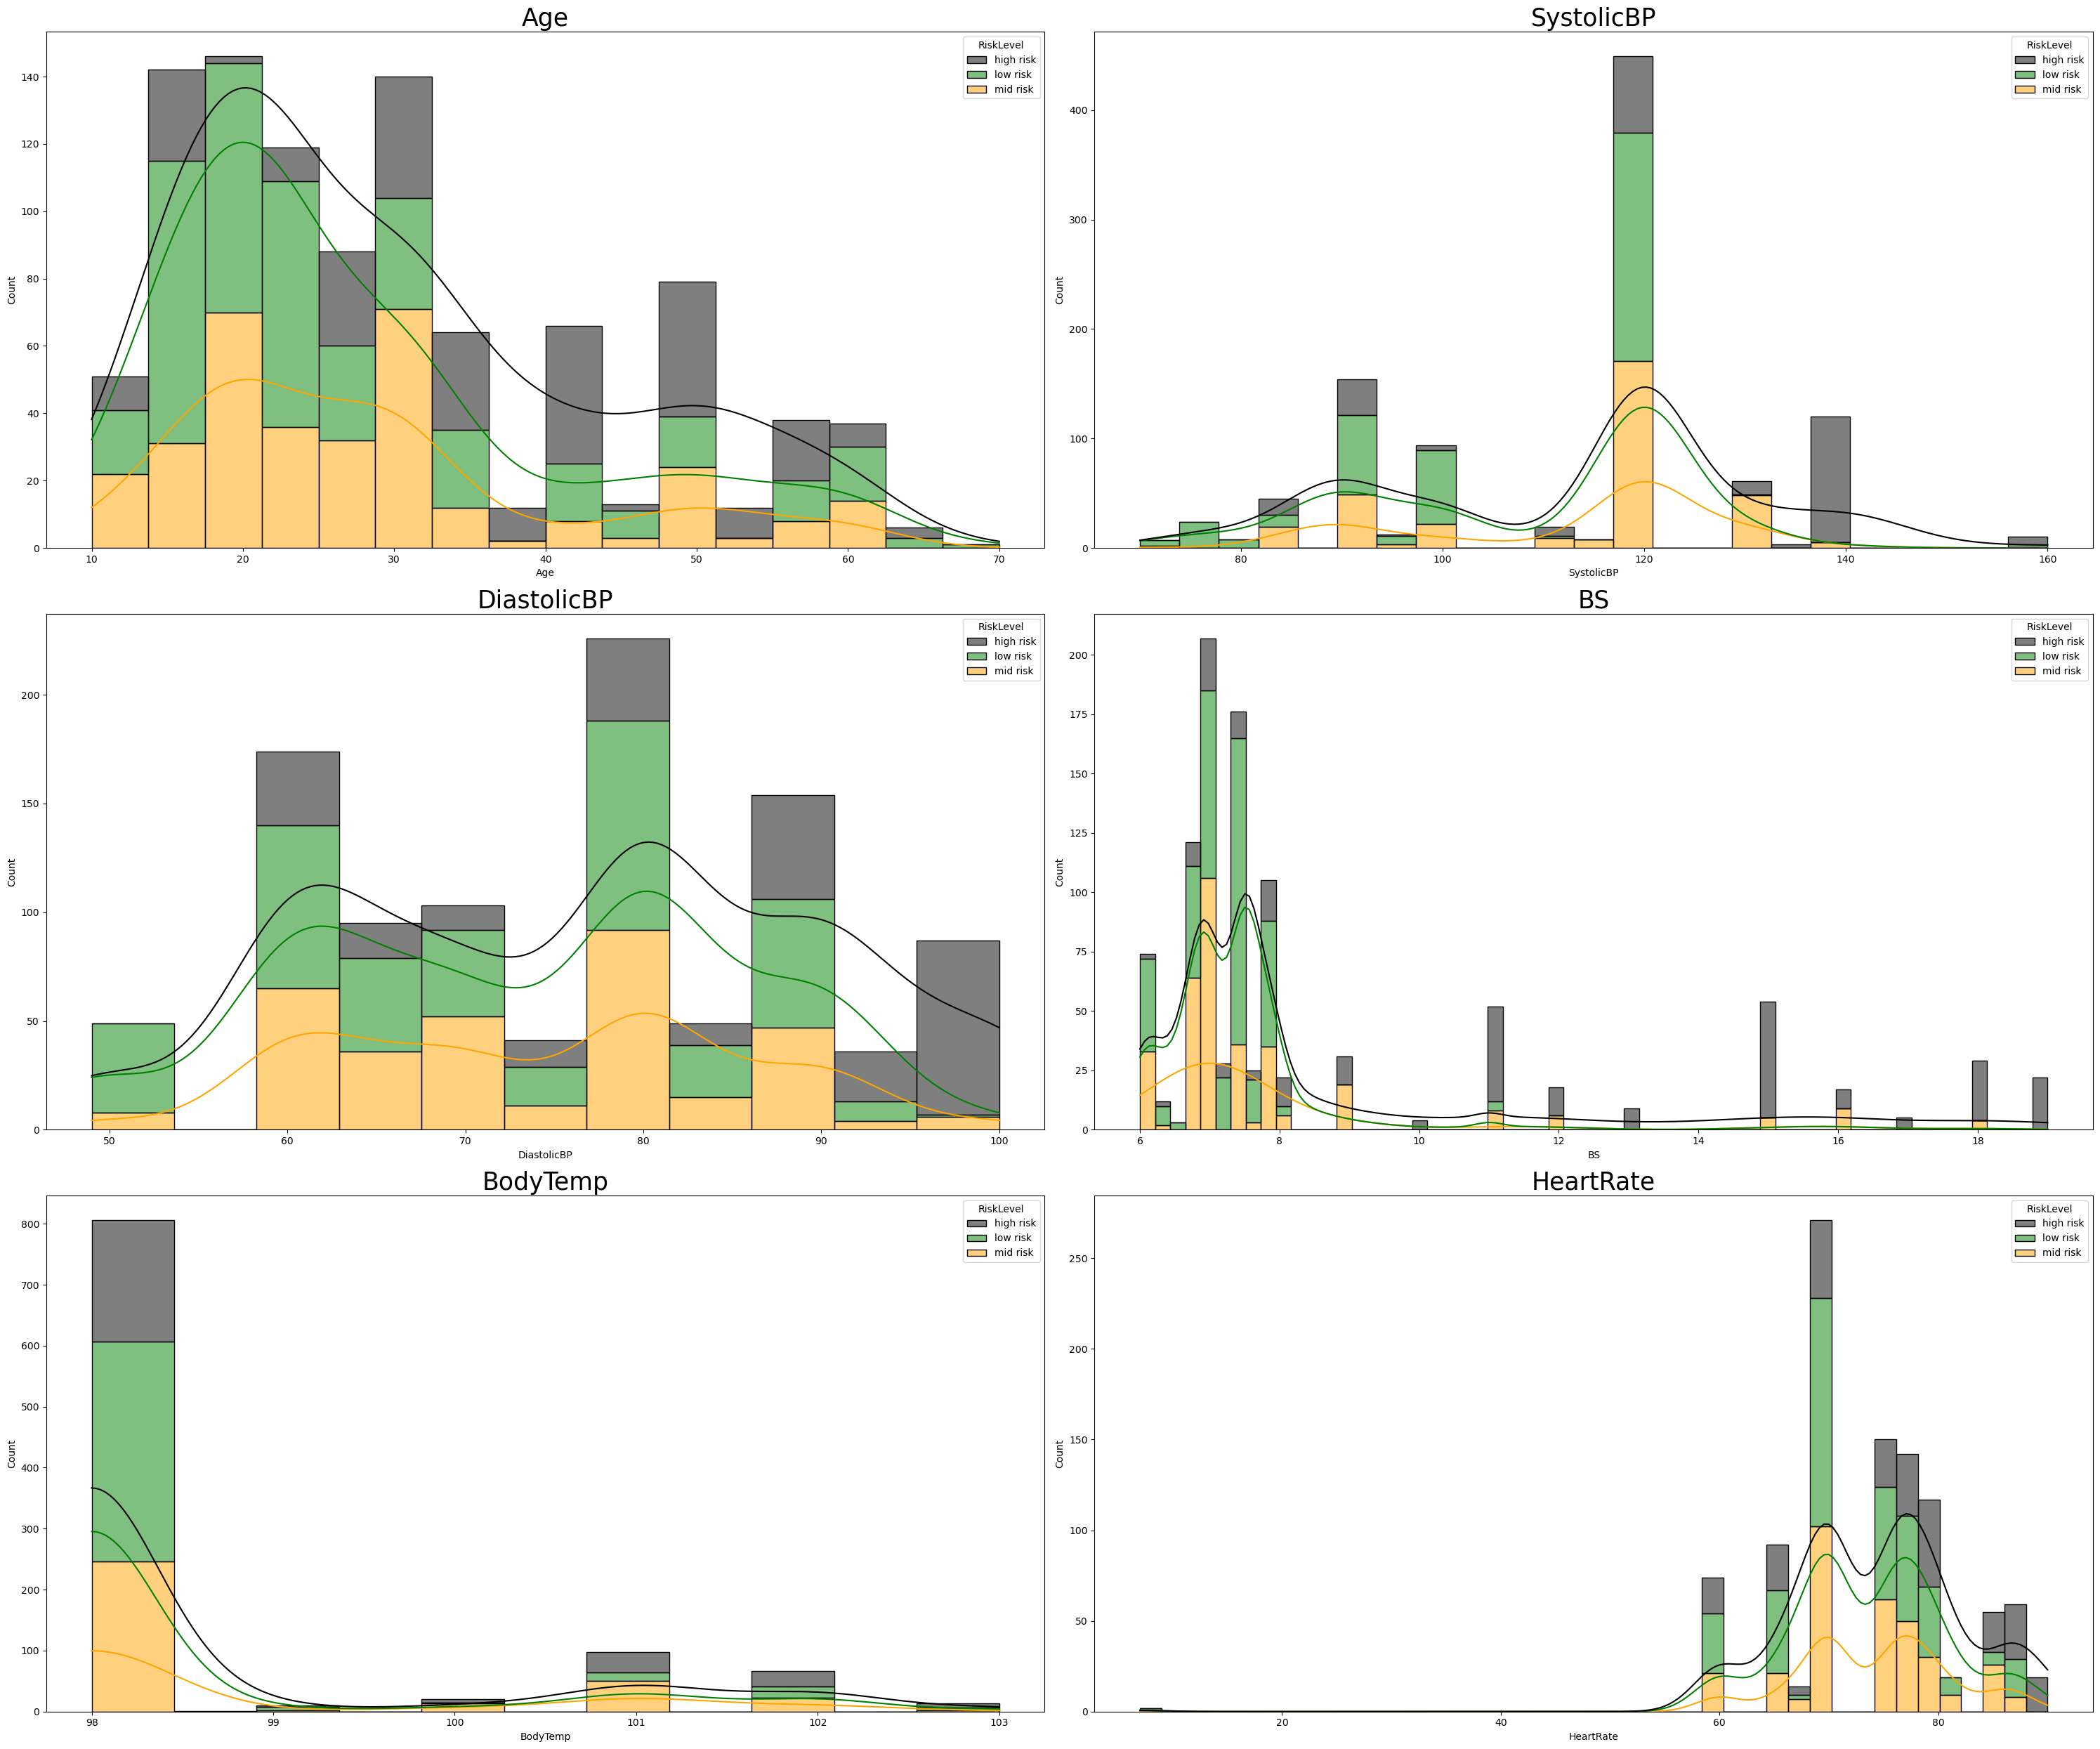

In [ ]:
# Plot stacked histograms for the feature variables
fig_his, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 25))
risk_level_order = ["high risk", "low risk", "mid risk"]
palette_colors = {"low risk": "green", "mid risk": "orange", "high risk": "black"}

# Plot stacked histograms for feature variables
for ax, column in zip(axes.flatten(), m_p_df_copy.columns):
    if column != "RiskLevel":  # Ensure we don't plot 'RiskLevel' itself
        sns.histplot(
            data=m_p_df_copy,
            x=column,
            kde=True,
            hue="RiskLevel",
            hue_order=risk_level_order,
            multiple="stack",
            palette=palette_colors,
            element="bars",
            ax=ax
        )
        ax.set_title(f"{column}", fontsize=25)
        
plt.tight_layout()
plt.savefig(relative_path_maternal_features_description)
plt.show()

In [13]:
relative_path_maternal_skwed_distrbution_to_check_outliner = os.path.join("..", "graphics", "maternal_skwed_distrbution_to_check_outliner.png.png")

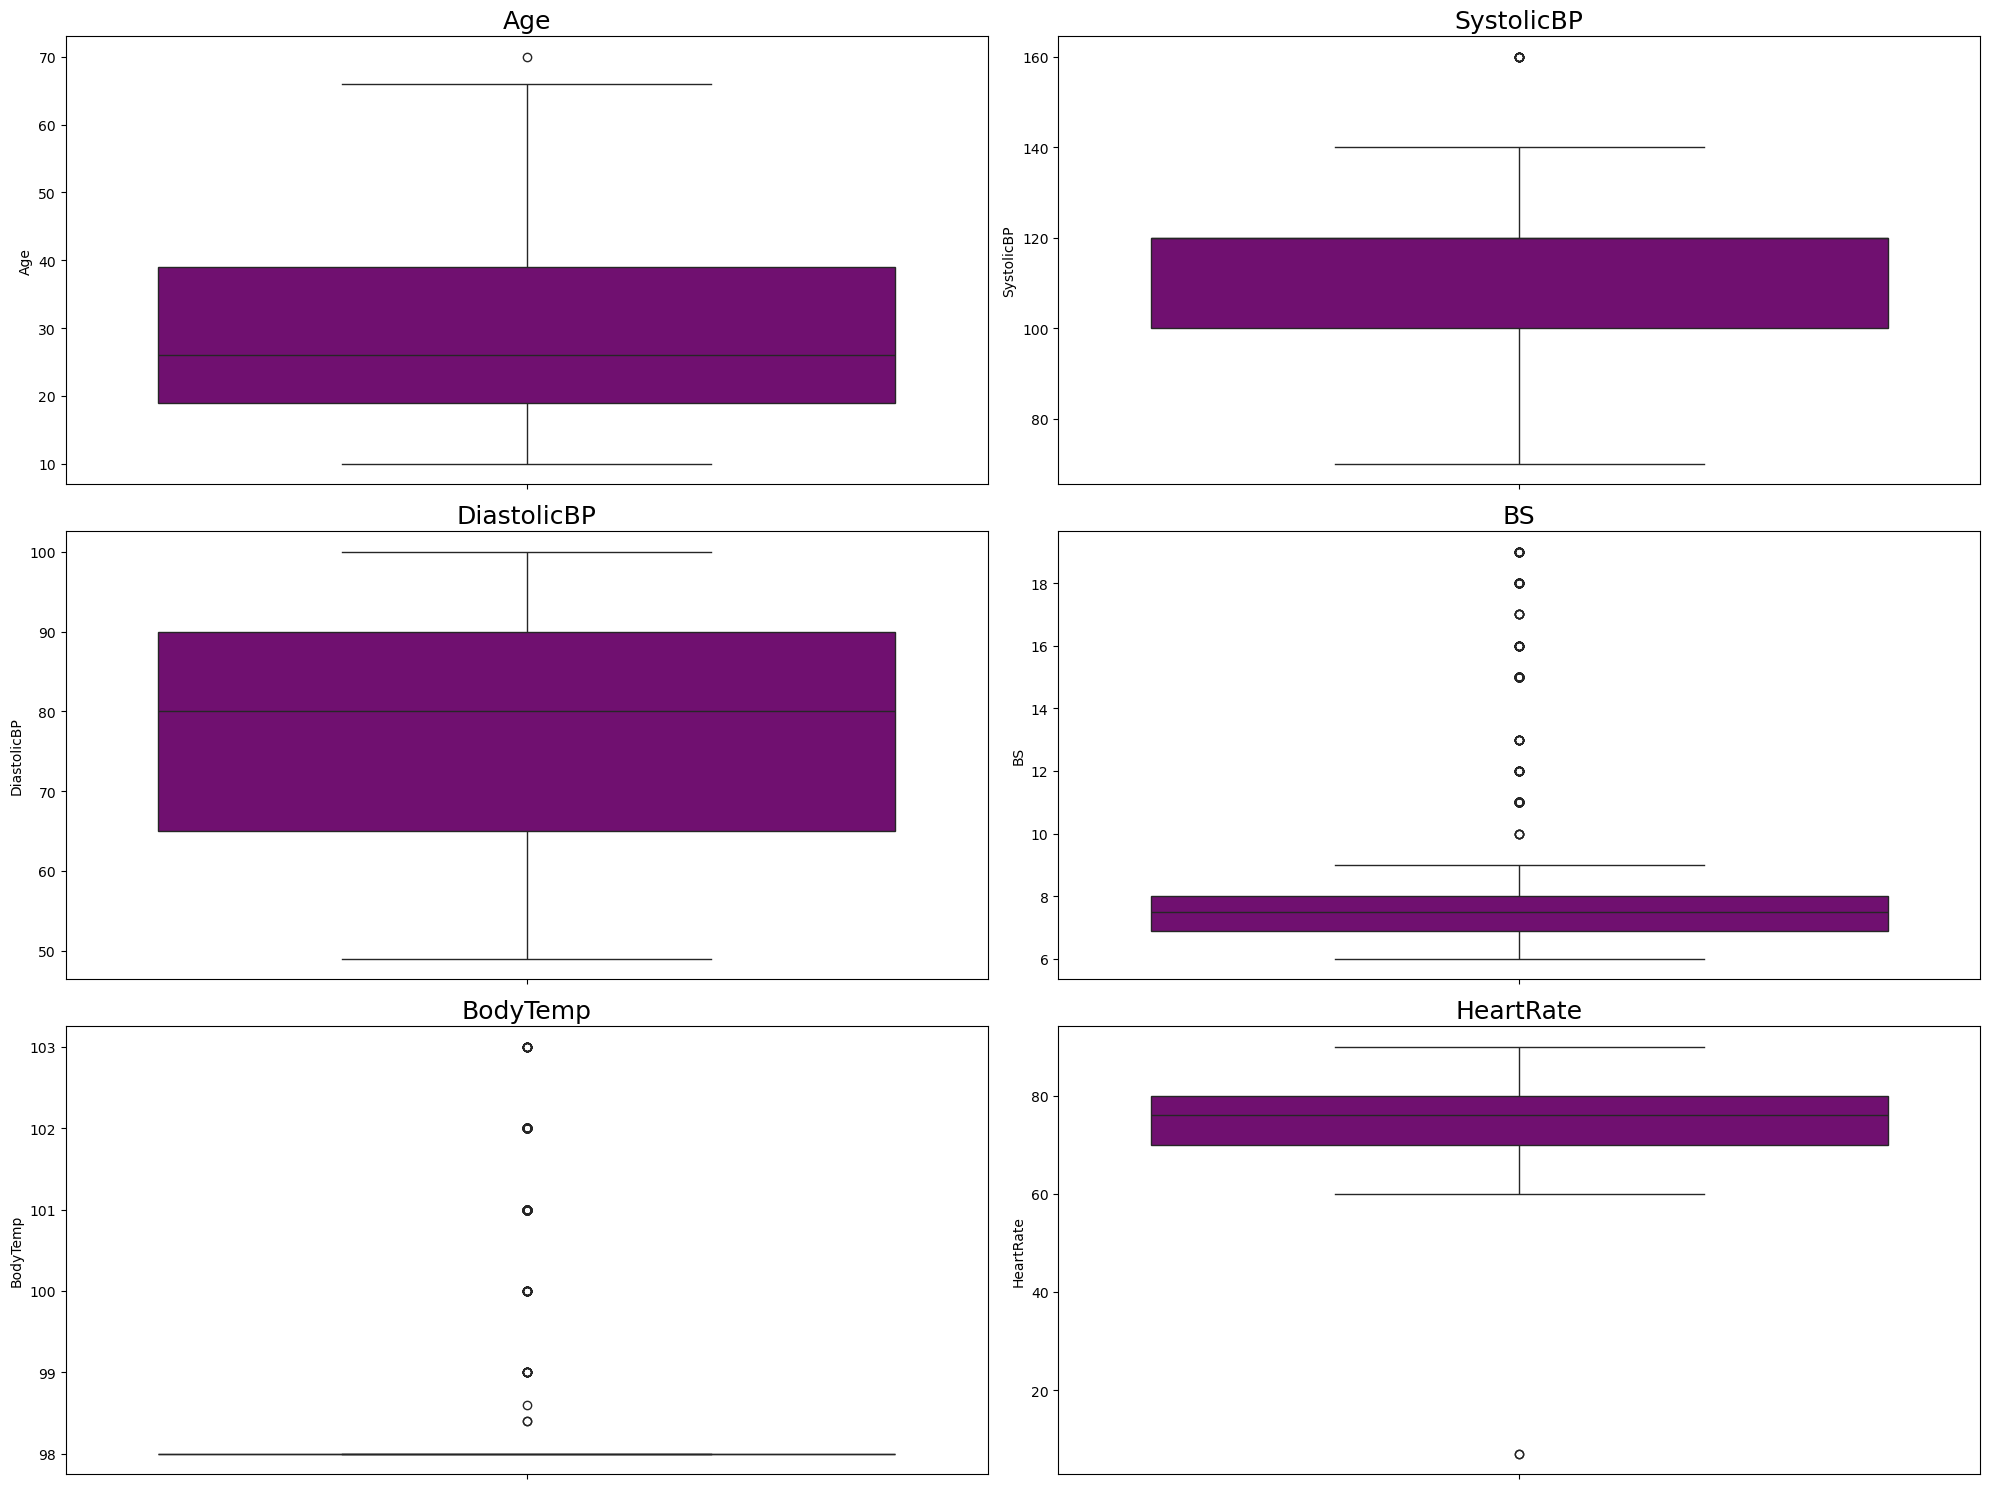

In [14]:
# plot boxplots for the feature variable
fig_boxplot, axes_boxplot = plt.subplots(nrows=3,ncols=2,figsize=(20,15))

for ax,column in zip(axes_boxplot.flatten(),m_p_df.columns):
    sns.boxplot(y=m_p_df[column],
                color="purple",
                ax=ax)
    ax.set_title(f"{column}", fontsize=18)

plt.tight_layout()
plt.savefig(relative_path_maternal_skwed_distrbution_to_check_outliner)
plt.show()

In [42]:
risk_mapping = {"low risk":0,"mid risk":1,"high risk":2}
m_p_df["RiskLevel"] = m_p_df["RiskLevel"].map(risk_mapping)
m_p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [43]:
m_p_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


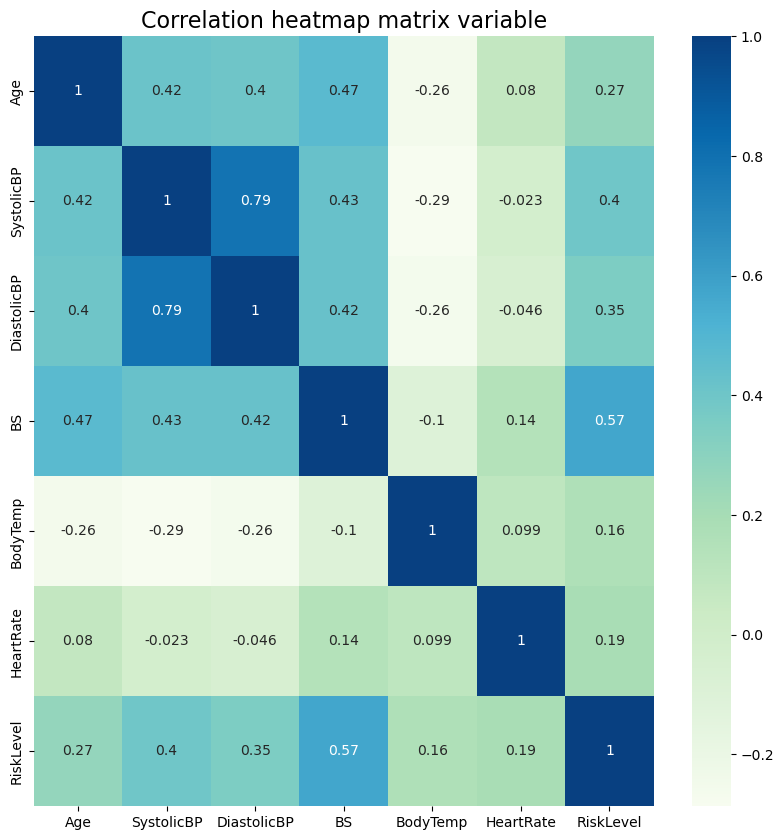

In [44]:
# create correlation matrix
os.makedirs("graphics", exist_ok=True)
plt.figure(figsize=(10,10))
sns.heatmap(m_p_df.corr(), annot=True, cmap="GnBu")
plt.title("Correlation heatmap matrix variable",fontsize=16)
plt.savefig("graphics\maternal_features_correlation_matrix.png")
plt.show()

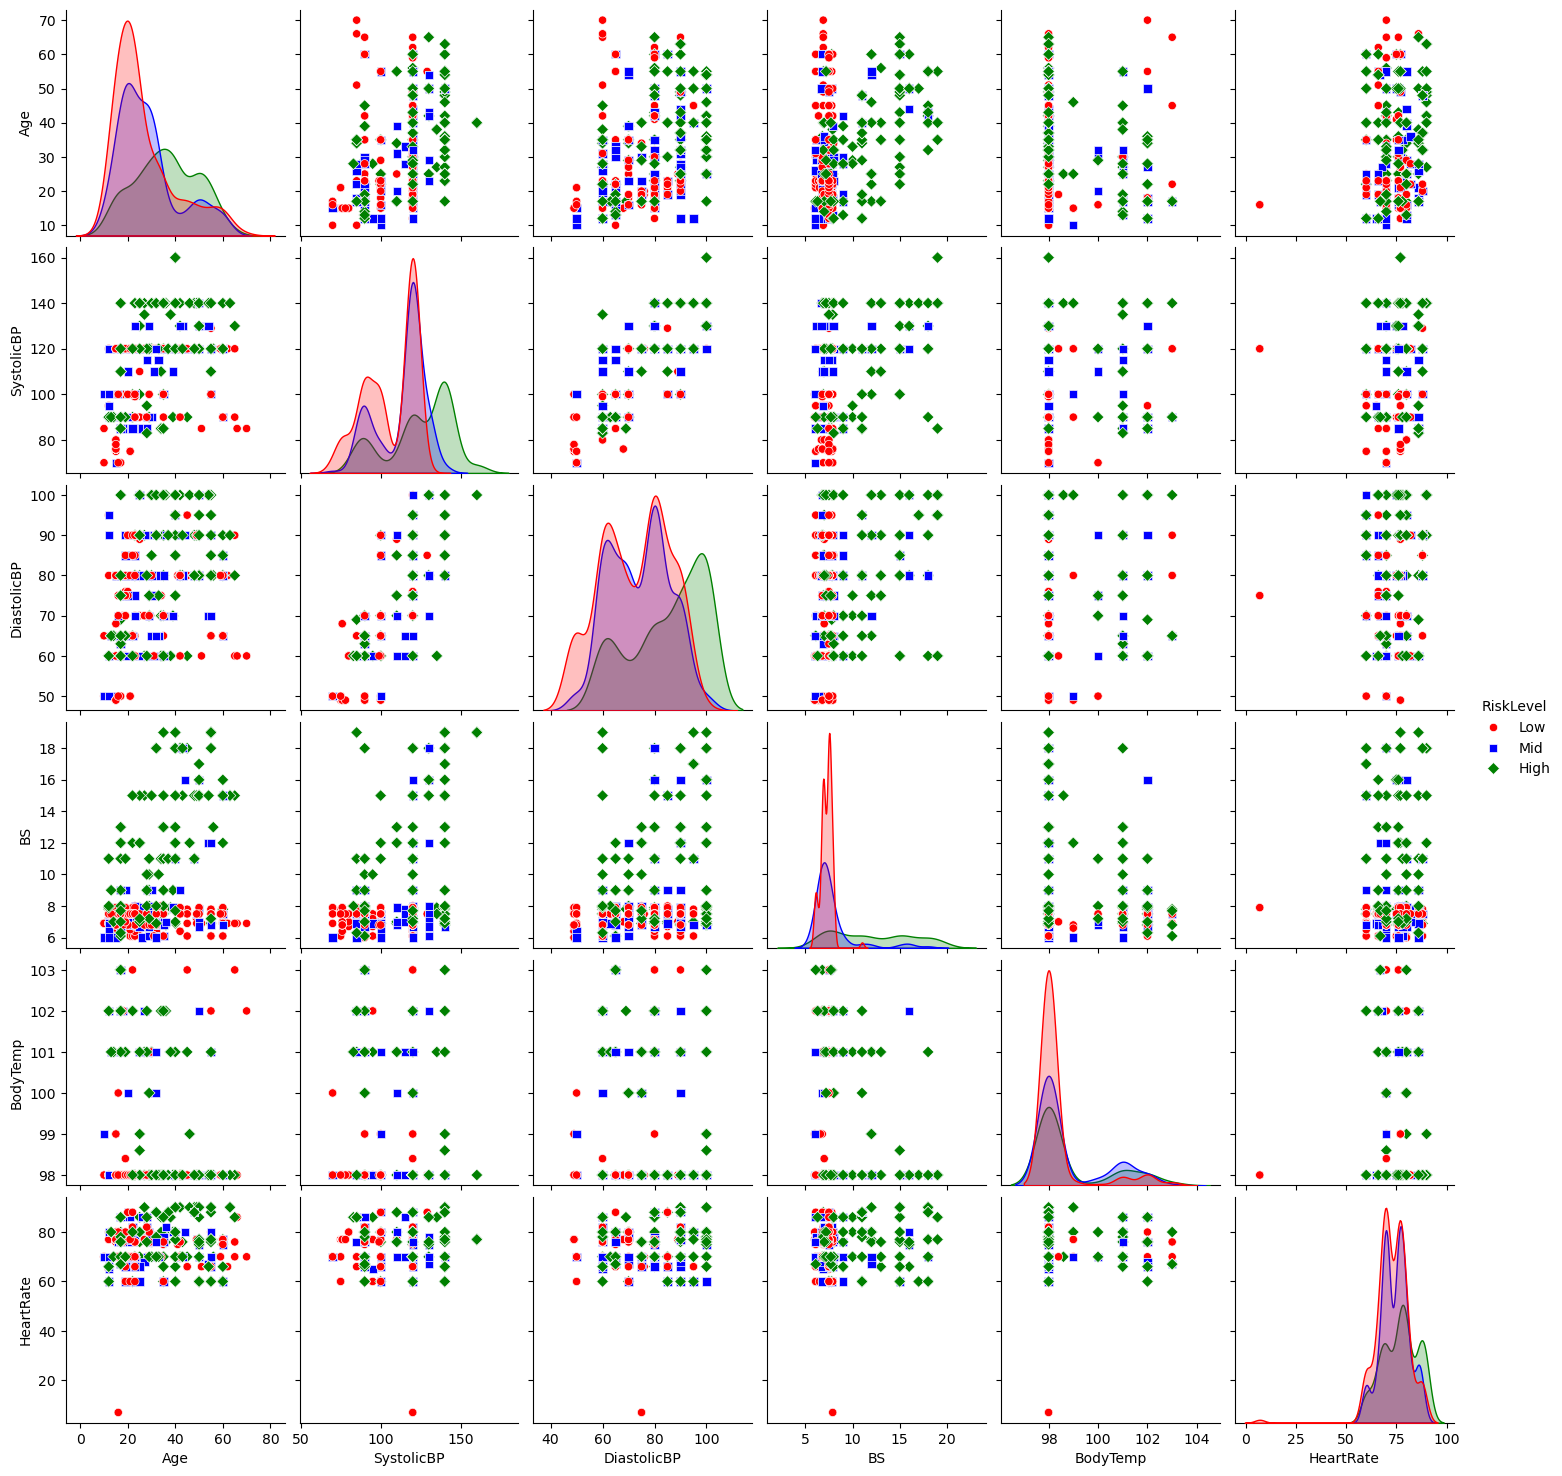

In [45]:
# create pairplot with Risklevel
risk_colors = {0: "red", 1: "blue", 2: "green"}
plot = sns.pairplot(m_p_df,hue='RiskLevel',
                    palette=risk_colors,
                    markers=["o","s","D"])

legends_labels = {"0":"Low","1":"Mid","2":"High"}
for text, label in zip(plot._legend.texts,legends_labels.values()):
    text.set_text(label)
plt.savefig("./graphics/maternal_pairplot_to_see_patterns.png")
plt.show()

In [32]:
# dealing with multicollinearilty
# variance inflamtion factor (VIF) calculations
X = m_p_df[['SystolicBP','DiastolicBP']]
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_data

,Variable,VIF
0,SystolicBP,79.96833
1,DiastolicBP,79.96833


In [47]:
# As from the above observation we found that the SystolicBP and DiastolicBP provide us same variance 
# in conclusion to that considering the DiastolicBP as it is a more crucial field 
mp_df_model = m_p_df.drop(columns='SystolicBP',axis=1)


In [48]:
mp_df_model

,Age,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,80,15.0,98.0,86,2
1,35,90,13.0,98.0,70,2
2,29,70,8.0,100.0,80,2
3,30,85,7.0,98.0,70,2
4,35,60,6.1,98.0,76,0
...,...,...,...,...,...,...
1009,22,60,15.0,98.0,80,2
1010,55,90,18.0,98.0,60,2
1011,35,60,19.0,98.0,86,2
1012,43,90,18.0,98.0,70,2


In [49]:
#indentify outliers
m_p_df.HeartRate.sort_values().head()

908     7
499     7
702    60
783    60
784    60
Name: HeartRate, dtype: int64

In [50]:
# remove outliner
mp_df_model = mp_df_model.drop(mp_df_model.index[mp_df_model.HeartRate == 7])

In [51]:
mp_df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1012 non-null   int64  
 1   DiastolicBP  1012 non-null   int64  
 2   BS           1012 non-null   float64
 3   BodyTemp     1012 non-null   float64
 4   HeartRate    1012 non-null   int64  
 5   RiskLevel    1012 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 55.3 KB


## Model Buliding

In [54]:
mp_df_model.columns

Index(['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel'], dtype='object')

In [55]:
mp_df_model.head(n=3)

,Age,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,80,15.0,98.0,86,1
1,35,90,13.0,98.0,70,1
2,29,70,8.0,100.0,80,1


In [52]:
columns = ["Age", "DiastolicBP","BS","BodyTemp","HeartRate"]
scale_x = StandardScaler()
X_vari = pd.DataFrame(scale_x.fit_transform(mp_df_model.drop(["RiskLevel"],axis=1),),columns=columns)

In [53]:
X_vari.head()

,Age,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.363796,0.254566,1.903633,-0.485808,1.538308
1,0.378765,0.974379,1.296644,-0.485808,-0.589878
2,-0.066772,-0.465247,-0.220828,0.972192,0.740239
3,0.007484,0.614473,-0.524323,-0.485808,-0.589878
4,0.378765,-1.185059,-0.797468,-0.485808,0.208192


In [54]:
Y_vari = pd.DataFrame(mp_df_model["RiskLevel"])

In [105]:
Y_vari.head()

,RiskLevel
0,1
1,1
2,1
3,1
4,0


In [55]:
# train and split dataset
X_train,X_test,y_train,y_test = train_test_split(X_vari,Y_vari,test_size=0.3,random_state = 42,stratify = Y_vari)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((708, 5), (304, 5), (708, 1), (304, 1))

## Logistic Regression

In [107]:
# logistic regression
logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train,y_train)
print(f"Baseline logistice regression: {round(logistic_regression_mod.score(X_test, y_test),3)}")
pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline logistice regression: 0.602


In [108]:
# cross validate logistic regression
score_lr = cross_val_score(logistic_regression,X_train,y_train,cv=3,scoring="accuracy")
print(f"Score (cross validate) for logistic regression model:\n{score_lr}")
print(f"CrossValMeans:{round(score_lr.mean(),3)}")
print(f"Cross Validation:{round(score_lr.std(),3)}")

Score (cross validate) for logistic regression model:
[0.57627119 0.60169492 0.57627119]
CrossValMeans:0.585
Cross Validation:0.012


In [109]:
# param dic
params_lr = {"tol":[0.0001,0.0002,0.0003],
             "C":[0.01,0.1,1,10,100],
             "intercept_scaling":[1,2,3,4],
             "solver":["liblinear","lbfgs","newton-cg"],
             "max_iter":[100,200,300]}

In [110]:
GridSearchCV_lr = GridSearchCV(estimator=linear_model.LogisticRegression(),
                               param_grid=params_lr,
                               cv=3,
                               scoring="accuracy",
                               return_train_score=True)

In [112]:
GridSearchCV_lr.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [1, 2, 3, 4],
                         'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             return_train_score=True, scoring='accuracy')

In [113]:
print(f"Best estimater for Logistic regression model:\n{GridSearchCV_lr.best_estimator_}")
print(f"Best parameter value for Logistic regression model:\n{GridSearchCV_lr.best_params_}")
print(f"Best score for Logistic regression model:\n{GridSearchCV_lr.best_score_}")

Best estimater for Logistic regression model:
LogisticRegression(C=0.01, intercept_scaling=2, solver='liblinear')
Best parameter value for Logistic regression model:
{'C': 0.01, 'intercept_scaling': 2, 'max_iter': 100, 'solver': 'liblinear', 'tol': 0.0001}
Best score for Logistic regression model:
0.597457627118644


In [114]:
lr_train_model = linear_model.LogisticRegression(C=0.01, intercept_scaling=2, max_iter=100,solver = "liblinear", tol=0.0001, random_state=42)
mod = logistic_regression.fit(X_train,y_train)
lr_prediction_mod = logistic_regression_mod.predict(X_test)

lr_meansqr = mean_squared_error(y_test,pred_logistic_regression)
rmse_lr = np.sqrt(mean_squared_error(y_test,pred_logistic_regression))
score_lr_train = logistic_regression_mod.score(X_train,y_train)
score_lr_test = logistic_regression_mod.score(X_test,y_test)

In [115]:
print(f"Mean Squred error for logistic regression:{round(lr_meansqr,3)}")
print(f"Mean Squred error for logistic regression:{round(rmse_lr,3)}")
print(f"Coefficient of determination for logistic regression training set:{round(score_lr_train,3)}")
print(f"Coefficient of determination for logistic regression testing set:{round(score_lr_test,3)}")

Mean Squred error for logistic regression:1.276
Mean Squred error for logistic regression:1.13
Coefficient of determination for logistic regression training set:0.605
Coefficient of determination for logistic regression testing set:0.602


In [116]:
# classificatio report
print(f"Classification report")
print(classification_report(y_test,pred_logistic_regression))
print("confusion_matrix")
print(confusion_matrix(y_test, pred_logistic_regression))

Classification report
              precision    recall  f1-score   support

           0       0.55      0.83      0.66       121
           1       0.80      0.82      0.81        82
           2       0.41      0.16      0.23       101

    accuracy                           0.60       304
   macro avg       0.59      0.60      0.57       304
weighted avg       0.57      0.60      0.56       304

confusion_matrix
[[100   6  15]
 [  7  67   8]
 [ 74  11  16]]


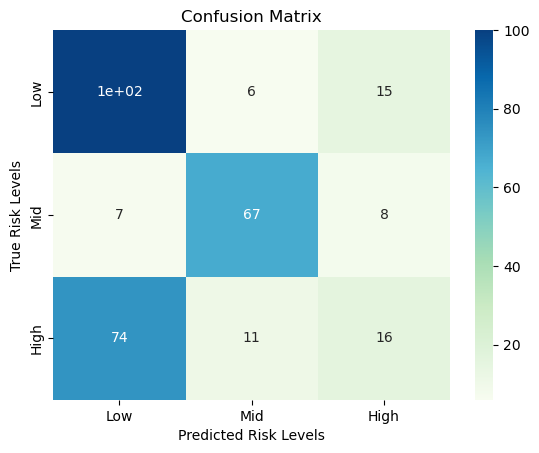

In [117]:
fig_lr, ax= plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred_logistic_regression), annot=True, ax=ax, cmap = "GnBu");

ax.set_xlabel("Predicted Risk Levels");
ax.set_ylabel("True Risk Levels");  
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Low", "Mid", "High"]);
ax.yaxis.set_ticklabels(["Low", "Mid", "High"]);

In [119]:
fig_lr.savefig("./graphics/confusion_matrix_lr.png")
fig_lr.show()

## K nearest neighbors

In [120]:
# baseline model of k-Nearest Neighbors
knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train,y_train)
print(f"Baseline Nearest Neighboard:{round(knn_mod.score(X_test,y_test),3)}")
pred_knn = knn_mod.predict(X_test)

Baseline Nearest Neighboard:0.658


In [121]:
# cross validation k-nearest neighbors model
scores_knn = cross_val_score(knn, X_train,y_train, cv=3, scoring="accuracy")
print(f"Score(cross validate) for k-Nearest Neighbors model:\n{scores_knn}")
print(f"CrossValMeans:\n{round(scores_knn.mean(),3)}")
print(f"Cross value standard deviation:{round(scores_knn.std(),3)}")

Score(cross validate) for k-Nearest Neighbors model:
[0.65677966 0.67372881 0.61440678]
CrossValMeans:
0.648
Cross value standard deviation:0.025


In [122]:
print(cross_val_score(knn, X_train, y_train, cv=3, scoring="precision"))
print(cross_val_score(knn, X_train, y_train, cv=3, scoring="recall"))
print(cross_val_score(knn, X_train, y_train, cv=3, scoring="f1"))
print(cross_val_score(knn, X_train, y_train, cv=3, scoring="roc_auc"))
print(cross_val_score(knn, X_train, y_train, cv=3, scoring="neg_log_loss"))
print(cross_val_score(knn, X_train, y_train, cv=3, scoring="neg_mean_squared_error"))
print(cross_val_score(knn, X_train, y_train, cv=3, scoring="neg_mean_absolute_error"))


[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[-3.26379055 -2.96450808 -3.71041025]
[-0.91525424 -0.83474576 -1.11016949]
[-0.53389831 -0.49576271 -0.62711864]


In [123]:
params_knn = {"leaf_size":list(range(1,30)),
              "n_neighbors":list(range(1,21)),
              "p":[1,2],
              "weights":['uniforms','distance']}

In [124]:
# grid search cv for knn
GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_knn, cv=3, scoring="accuracy",
                                return_train_score=True)

In [125]:
GridSearchCV_knn.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2], 'weights': ['uniforms', 'distance']},
             return_train_score=True, scoring='accuracy')

In [126]:
print(f"Best estimator for KNN model:\n{GridSearchCV_knn.best_estimator_}")
print(f"Best parameter values:\n{GridSearchCV_knn.best_params_}")
print(f"Best score for GNB model: {round(GridSearchCV_knn.best_score_, 3)}")

Best estimator for KNN model:
KNeighborsClassifier(leaf_size=1, n_neighbors=17, p=1, weights='distance')
Best parameter values:
{'leaf_size': 1, 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}
Best score for GNB model: 0.784


In [127]:
# knn tuning with new parameter
knn = KNeighborsClassifier(leaf_size=1,n_neighbors=17,weights='distance',p=1)
knn_model = knn.fit(X_train,y_train)

pred_knn = knn_mod.predict(X_test)

mse_knn = mean_absolute_error(y_test,pred_knn)
rmse_knn= np.sqrt(mean_absolute_error(y_test,pred_knn))
score_knn_train = knn_model.score(X_train,y_train)
score_knn_test = knn_model.score(X_test,y_test)

In [128]:
print(f"Mean Square Error for K_Nearest Neighbor  = {round(mse_knn, 3)}")
print(f"Root Mean Square Error for K_Nearest Neighbor = {round(rmse_knn, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_knn_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_knn_test, 3)}")

Mean Square Error for K_Nearest Neighbor  = 0.579
Root Mean Square Error for K_Nearest Neighbor = 0.761
R^2(coefficient of determination) on training set = 0.939
R^2(coefficient of determination) on testing set = 0.783


In [129]:
print("Classification Report")
print(classification_report(y_test, pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       121
           1       0.89      0.70      0.78        82
           2       0.52      0.48      0.49       101

    accuracy                           0.66       304
   macro avg       0.68      0.65      0.66       304
weighted avg       0.67      0.66      0.66       304

Confusion Matrix:
[[95  2 24]
 [ 4 57 21]
 [48  5 48]]


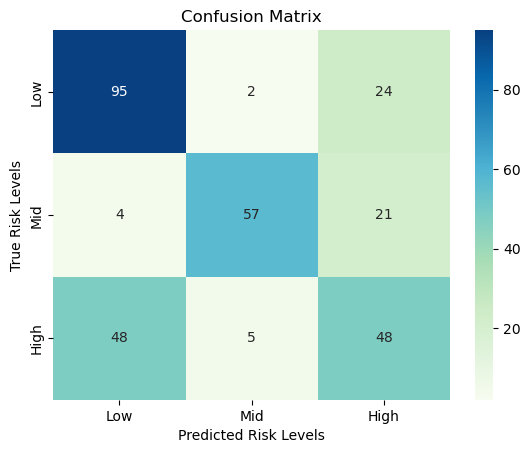

In [130]:
fig_knn, ax= plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, ax = ax, cmap = "GnBu");

ax.set_xlabel("Predicted Risk Levels");
ax.set_ylabel("True Risk Levels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Low", "Mid", "High"]);
ax.yaxis.set_ticklabels(["Low", "Mid", "High"]);

In [131]:
fig_knn.savefig('./graphics/confusion_matrix_knn.png')
plt.show()

## Random Forest

In [56]:
# Baseline model of Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test, y_test), 3)}")
pred_random_forest = random_forest_mod.predict(X_test)

c:\Users\LENOVO\anaconda3\envs\myenvseg\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Baseline Random Forest: 0.803


In [57]:
# Cross validate Random Forest Classifier model
scores_RF = cross_val_score(random_forest, X_train, y_train, cv=3, scoring = "accuracy")
print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

c:\Users\LENOVO\anaconda3\envs\myenvseg\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\LENOVO\anaconda3\envs\myenvseg\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Scores(Cross validate) for Random forest model:
[0.80084746 0.80932203 0.78389831]
CrossValMeans: 0.798
CrossValStandard Deviation: 0.011


c:\Users\LENOVO\anaconda3\envs\myenvseg\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [58]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 2, 4],
              "n_estimators" :[50,100,200,300,400],
              "max_depth": [None, 10, 20, 30],
              "criterion": ["gini", "entropy"]             
              }

In [59]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF,
                                cv=3,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [60]:
GridSearchCV_RF.fit(X_train, y_train)

c:\Users\LENOVO\anaconda3\envs\myenvseg\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\LENOVO\anaconda3\envs\myenvseg\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\LENOVO\anaconda3\envs\myenvseg\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\LENOVO\anaconda3\envs\myenvseg\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 6, 20],
                         'n_estimators': [50, 100, 200, 300, 400]},
             return_train_score=True, scoring='accuracy')

In [62]:
print(f"Best estimator for RF model:\n{GridSearchCV_RF.best_estimator_}")
print(f"Best parameter values for RF model:\n{GridSearchCV_RF.best_params_}")
print(f"Best score for RF model: {round(GridSearchCV_RF.best_score_, 3)}")

Best estimator for RF model:
RandomForestClassifier(criterion='entropy', max_depth=10)
Best parameter values for RF model:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for RF model: 0.805


In [63]:
# Test with new parameter
random_forest = RandomForestClassifier(criterion="entropy", max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)
random_forest_mod = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_mod.predict(X_test)

mse_random_forest = mean_squared_error(y_test, pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, pred_random_forest))
score_random_forest_train = random_forest_mod.score(X_train, y_train)
score_random_forest_test = random_forest_mod.score(X_test, y_test)

c:\Users\LENOVO\anaconda3\envs\myenvseg\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [64]:
print(f"Mean Square Error for Random Forest = {round(mse_random_forest, 3)}")
print(f"Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")

Mean Square Error for Random Forest = 0.28
Root Mean Square Error for Random Forest = 0.529
R^2(coefficient of determination) on training set = 0.912
R^2(coefficient of determination) on testing set = 0.789


In [65]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       121
           1       0.70      0.75      0.73       101
           2       0.92      0.79      0.85        82

    accuracy                           0.79       304
   macro avg       0.80      0.79      0.79       304
weighted avg       0.80      0.79      0.79       304

Confusion Matrix:
[[99 21  1]
 [20 76  5]
 [ 6 11 65]]


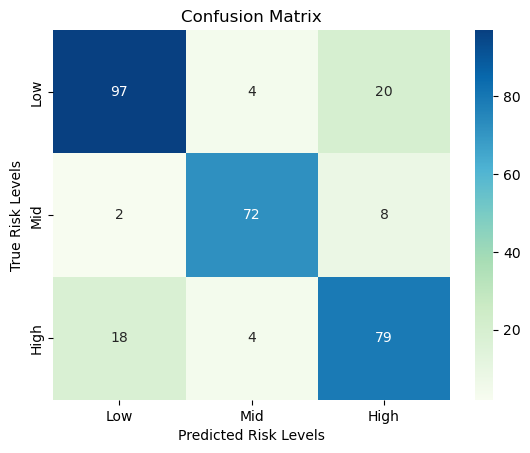

In [141]:
fig_rf, ax= plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred_random_forest), annot=True, ax = ax, cmap = "GnBu");

ax.set_xlabel("Predicted Risk Levels");
ax.set_ylabel("True Risk Levels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Low", "Mid", "High"]);
ax.yaxis.set_ticklabels(["Low", "Mid", "High"]);

In [142]:
fig_rf.savefig("./graphics/confusion_matrix_rf.png")
plt.show()

### Gradient Bossting Classification

In [143]:
# Baseline model of gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc_mod = gbc.fit(X_train, y_train)
print(f"Baseline gradient boosting classifier: {round(gbc_mod.score(X_test, y_test), 3)}")
pred_gbc = gbc_mod.predict(X_test)

Baseline gradient boosting classifier: 0.737


In [144]:
# Cross validate Gradient Boosting Classifier model
scores_GBC = cross_val_score(gbc, X_train, y_train, cv=3, scoring = "accuracy")
print(f"Scores(Cross validate) for Gradient Boosting Classifier model:\n{scores_GBC}")
print(f"CrossValMeans: {round(scores_GBC.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_GBC.std(), 3)}")

Scores(Cross validate) for Gradient Boosting Classifier model:
[0.78389831 0.78389831 0.79237288]
CrossValMeans: 0.787
CrossValStandard Deviation: 0.004


In [145]:
params_GBC = {"loss": ["deviance", "log_loss"],
              "learning_rate": [0.01, 0.05, 0.075, 0.1], 
              "n_estimators": [100, 250, 500],
              "max_depth": [3, 5, 8, 10],
              "subsample": [0.8, 1],
              }

In [146]:
GridSearchCV_GBC = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                param_grid=params_GBC,
                                cv=3,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [147]:
# Fit model with train data
GridSearchCV_GBC.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.075, 0.1],
                         'loss': ['deviance', 'log_loss'],
                         'max_depth': [3, 5, 8, 10],
                         'n_estimators': [100, 250, 500],
                         'subsample': [0.8, 1]},
             return_train_score=True, scoring='accuracy')

In [149]:
print(f"Best estimator values for GBC model:\n{GridSearchCV_GBC.best_estimator_}")
print(f"Best parameter values for GBC model:\n{GridSearchCV_GBC.best_params_}")
print(f"Best score value foe GBC model: {round(GridSearchCV_GBC.best_score_, 3)}")

Best estimator values for GBC model:
GradientBoostingClassifier(learning_rate=0.05, n_estimators=500, subsample=0.8)
Best parameter values for GBC model:
{'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Best score value foe GBC model: 0.811


In [150]:
# Test with new parameter
gbc = GradientBoostingClassifier(learning_rate=0.05, loss="log_loss", max_depth=3, n_estimators=500, subsample=0.8,random_state=42)
gbc_mod = gbc.fit(X_train, y_train)
pred_gbc = gbc_mod.predict(X_test)

mse_gbc = mean_squared_error(y_test, pred_gbc)
rmse_gbc = np.sqrt(mean_squared_error(y_test, pred_gbc))
score_gbc_train = gbc_mod.score(X_train, y_train)
score_gbc_test = gbc_mod.score(X_test, y_test)

In [151]:
print(f"Mean Square Error for Gradient Boosting Classifier = {round(mse_gbc, 3)}")
print(f"Root Mean Square Error for Gradient Boosting Classifier = {round(rmse_gbc, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_gbc_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_gbc_test, 3)}")

Mean Square Error for Gradient Boosting Classifier = 0.589
Root Mean Square Error for Gradient Boosting Classifier = 0.767
R^2(coefficient of determination) on training set = 0.925
R^2(coefficient of determination) on testing set = 0.806


In [152]:
print("Classification Report")
print(classification_report(y_test, pred_gbc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       121
           1       0.90      0.87      0.88        82
           2       0.73      0.75      0.74       101

    accuracy                           0.81       304
   macro avg       0.81      0.81      0.81       304
weighted avg       0.81      0.81      0.81       304

Confusion Matrix:
[[98  4 19]
 [ 2 71  9]
 [21  4 76]]


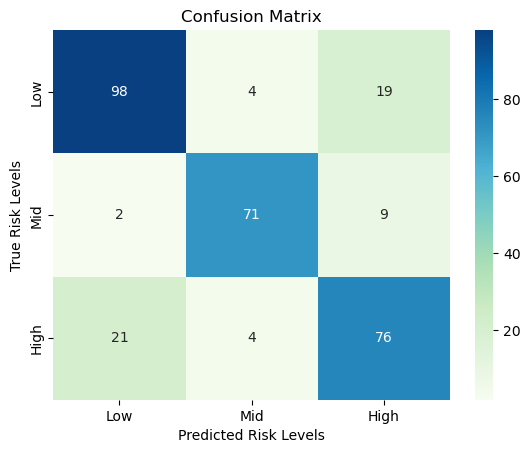

In [153]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot=True, ax = ax, cmap = "GnBu");

ax.set_xlabel("Predicted Risk Levels");
ax.set_ylabel("True Risk Levels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Low", "Mid", "High"]);
ax.yaxis.set_ticklabels(["Low", "Mid", "High"]);

In [154]:
# Create a DataFrame to store model evaluation results
results = pd.DataFrame({
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "Random Forest", "Gradient Boosting Classifier"],
    "Train Score": [
        # Calculate mean cross-validated accuracy for training set
        cross_val_score(logistic_regression_mod, X_train, y_train, cv=3).mean(),
        cross_val_score(knn_mod, X_train, y_train, cv=3).mean(),
        cross_val_score(random_forest_mod, X_train, y_train, cv=3).mean(),
        cross_val_score(gbc_mod, X_train, y_train, cv=3).mean(),
    ],
    "Test Score": [
        # Calculate accuracy on the test set
        logistic_regression_mod.score(X_test, y_test),
        knn_mod.score(X_test, y_test),
        random_forest_mod.score(X_test, y_test),
        gbc_mod.score(X_test, y_test),
    ]
})
# Additional Metrics (precision, recall, F1 score)
metrics = ["precision", "recall", "f1"]
for metric in metrics:
    results[f"{metric.capitalize()}"] = [
        precision_recall_fscore_support(y_test, model.predict(X_test), average="weighted")[metrics.index(metric)]
        for model in [logistic_regression_mod, knn_mod, random_forest_mod, gbc_mod]
    ]

result_df = results.sort_values(by="Test Score", ascending=False)
result_df = result_df.set_index("Test Score")
result_df

,Model,Train Score,Precision,Recall,F1
Test Score,,,,,
0.815789,Random Forest,0.789548,0.818047,0.815789,0.816580
0.805921,Gradient Boosting Classifier,0.799435,0.807579,0.805921,0.806614
0.657895,K-Nearest Neighbors,0.648305,0.668939,0.657895,0.657205
0.601974,Logistic Regression,0.584746,0.571354,0.601974,0.557273


The analysis demonstrates that the Random Forest model excels in predicting maternal risk, as evidenced by its superior performance metrics compared to other models. With an accuracy of 81.58% on the test dataset, a precision of 81.80%, a recall of 81.58%, and an F1 score of 81.66%, the Random Forest model consistently outperforms the Gradient Boosting Classifier, K-Nearest Neighbors, and Logistic Regression models. These metrics indicate that the Random Forest model effectively balances both precision and recall, ensuring that it accurately identifies high-risk cases while minimizing false positives and false negatives. Consequently, the Random Forest model is highly reliable for predicting maternal risk, making it an ideal choice for clinical applications where accurate and timely identification of at-risk patients is crucial for providing appropriate care and interventions.

Yes, Random Forest is a popular and effective machine learning technique in healthcare. Here's why:

1. **High Accuracy**: Random Forest tends to be highly accurate because it combines the results of multiple decision trees, reducing the risk of overfitting and improving generalization to new data.
2. **Feature Importance**: It provides insights into which features (variables) are most important for making predictions, helping healthcare professionals understand the factors influencing patient outcomes.
3. **Robustness**: It's less sensitive to noisy data and can handle large datasets with many features, making it suitable for complex medical data.
4. **Versatility**: Random Forest can be used for both classification (e.g., diagnosing diseases) and regression (e.g., predicting patient recovery times) tasks.

**Applications in Healthcare**:
- **Disease Prediction**: Predicting the risk of diseases such as diabetes, heart disease, and cancer.
- **Medical Diagnosis**: Assisting in the diagnosis of conditions based on symptoms and medical history.
- **Patient Outcome Prediction**: Estimating the likelihood of recovery, complications, or readmission.
- **Treatment Recommendations**: Suggesting personalized treatment plans based on patient data.

Overall, Random Forest's reliability, interpretability, and versatility make it a valuable tool in healthcare for improving patient care and decision-making.

In [157]:
import os

# Create the directory if it doesn't exist
os.makedirs('./model', exist_ok=True)


In [69]:
import pickle

In [76]:

os.makedirs("model", exist_ok=True)
pickle.dump(random_forest_mod, open('E:\gbc_ai\careers_planning\internships\Medial_treatment_DL\model\_finalized_maternal_model.sav', 'wb'))

In [75]:
pickle.dump(scale_x,open("E:\gbc_ai\careers_planning\internships\Medial_treatment_DL\model\scaler.sav",'wb'))

In [ ]:
pickle.dump(gbc_mod, open('E:\gbc_ai\careers_planning\internships\Medial_treatment_DL\model\model/_finalized_maternal_model_gbc.sav', 'wb'))

In [66]:
scaled_input = scale_x.transform([[35, 60, 6.1, 98.0, 76]])

# Make prediction
predicted_risk = random_forest_mod.predict(scaled_input)
print(predicted_risk)

[0]


c:\Users\LENOVO\anaconda3\envs\myenvseg\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\anaconda3\envs\myenvseg\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
predicted_risk

array([0], dtype=int64)